In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
df = pd.read_csv('kc_house_data.csv', encoding = 'windows-1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Условие 1: Задача 1
#### 1.2. Изучите стоимости недвижимости

In [45]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

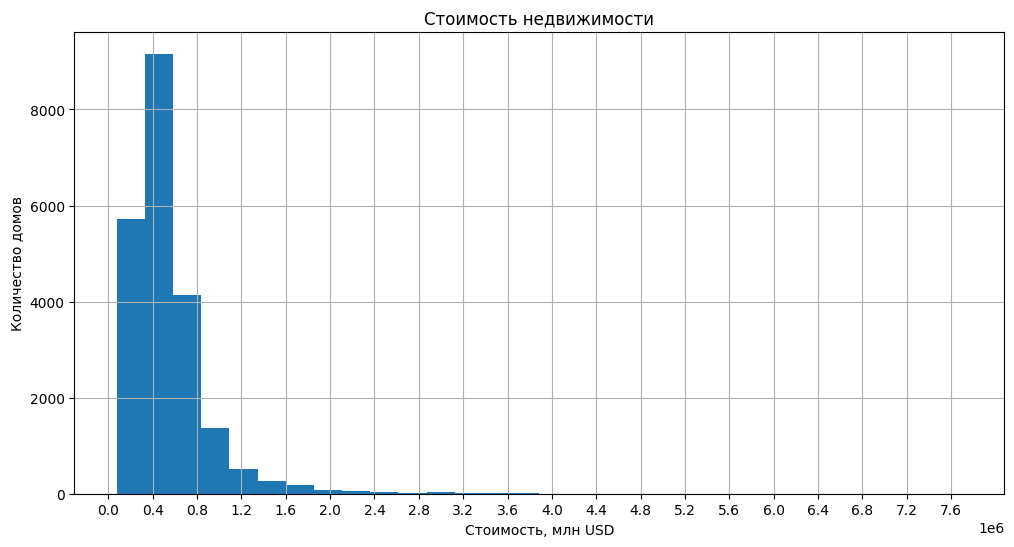

In [46]:
plt.figure(figsize = (12, 6))
plt.hist(df['price'], bins = 30)
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость, млн USD')
plt.ylabel('Количество домов')
plt.xticks (range(0, 8000000, 400000))
plt.grid();

Основная часть домов (более 17 тыс.) стоит до 1 миллиона долларов. Больше всего домов (свыше 9 тыс.) со стоимостью в районе полумиллиона долларов.

### 1.3. Изучите распределение квадратуры жилой

In [47]:
df['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

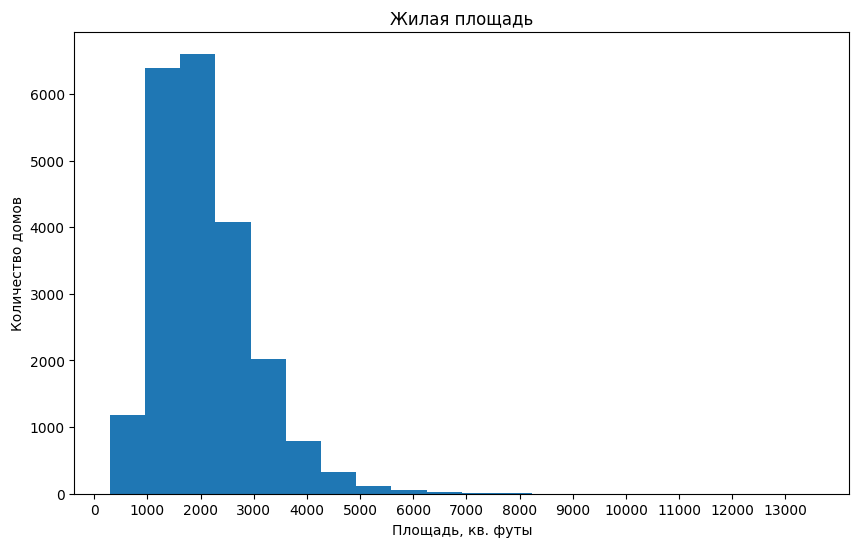

In [48]:
plt.figure(figsize = (10, 6))
plt.hist(df['sqft_living'], bins = 20)
plt.title('Жилая площадь')
plt.xlabel('Площадь, кв. футы')
plt.ylabel('Количество домов')
plt.xticks (range(0, 14000, 1000));


Больше всего домов (более 18 тыс.) с площадью от 1000 до 3500 тысяч футов. Средняя площадь в районе 2 тыс. кв.футов

### 1.4. Изучите распределение года постройки

In [49]:
df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

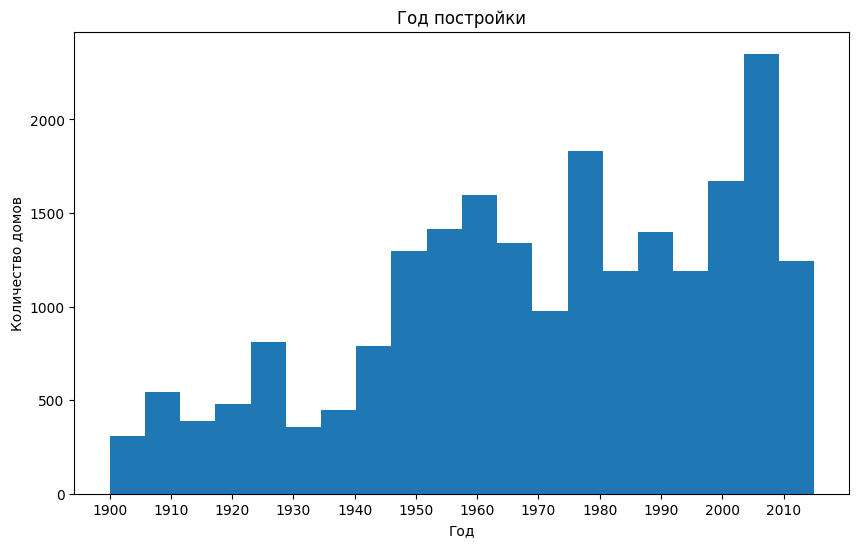

In [50]:
plt.figure(figsize = (10, 6))
plt.hist(df['yr_built'], bins = 20)
plt.title('Год постройки')
plt.xlabel('Год')
plt.ylabel('Количество домов')
plt.xticks (range(1900, 2020, 10));

Основная масса домов было построено во второй половине 20-го века. По десятилетиям - больше всего строилось в 70-е и нулевые

### Условие 2: 2 задача
#### 2.1. Изучите распределение домов от наличия вида на набережную

In [51]:
data = df['waterfront'].value_counts()
data.index = ['Нет','Да']

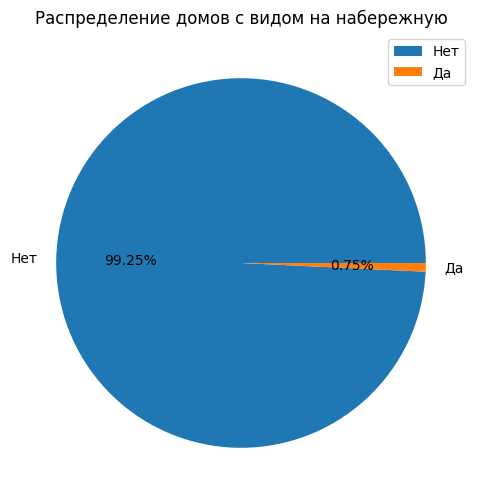

In [52]:
plt.figure(figsize = (10,6))
plt.pie(data, labels = data.index, autopct = '%1.2f%%')
plt.legend(data.index)
plt.title ('Распределение домов с видом на набережную');

Только 0,75% домов имеют вид на набережную

### 2.2. Изучите распределение этажей домов

In [53]:
data = df['floors'].value_counts()
data

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

Text(0.5, 1.0, 'Этажность домов')

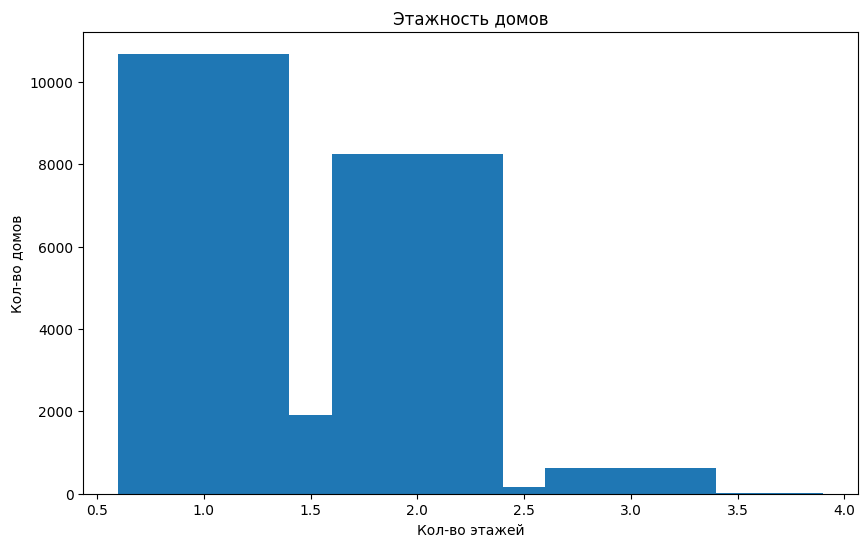

In [54]:
plt.figure(figsize = (10,6))
plt.bar (data.index, data)
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов')
plt.title('Этажность домов')


Более 10 тыс. домов одноэтажные и более 8 тысяч - двухэтажные

### 2.3. Изучите распределение состояния домов

In [55]:
data = df['condition'].value_counts()
data

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

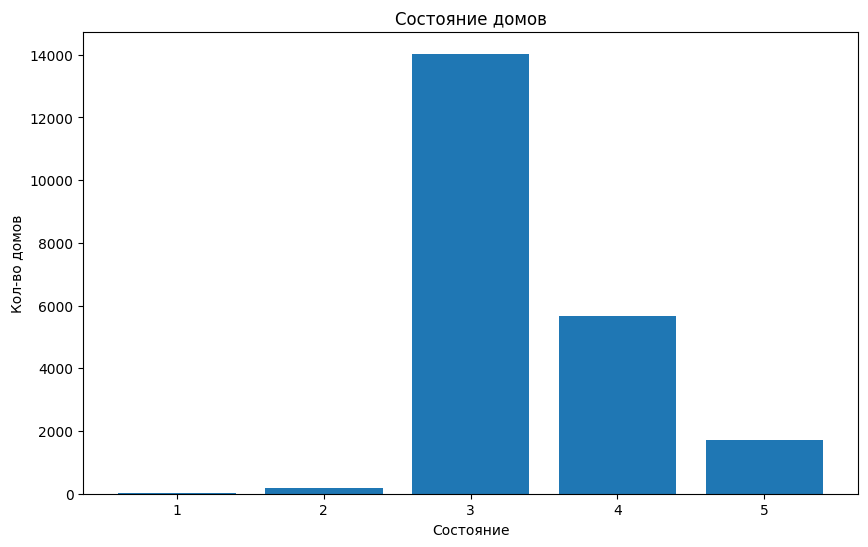

In [56]:
plt.figure(figsize = (10,6))
plt.bar (data.index, data)
plt.xlabel('Состояние')
plt.ylabel('Кол-во домов')
plt.title('Состояние домов');

Больше всего домов с состоянием 3 (около 14 тыс.) и состоянием 4 (около 6 тыс.)

### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [57]:
data = df.drop(columns = ['date'])
mtr = data.corr().round(1)
mtr[np.abs(mtr) < 0.3] =0

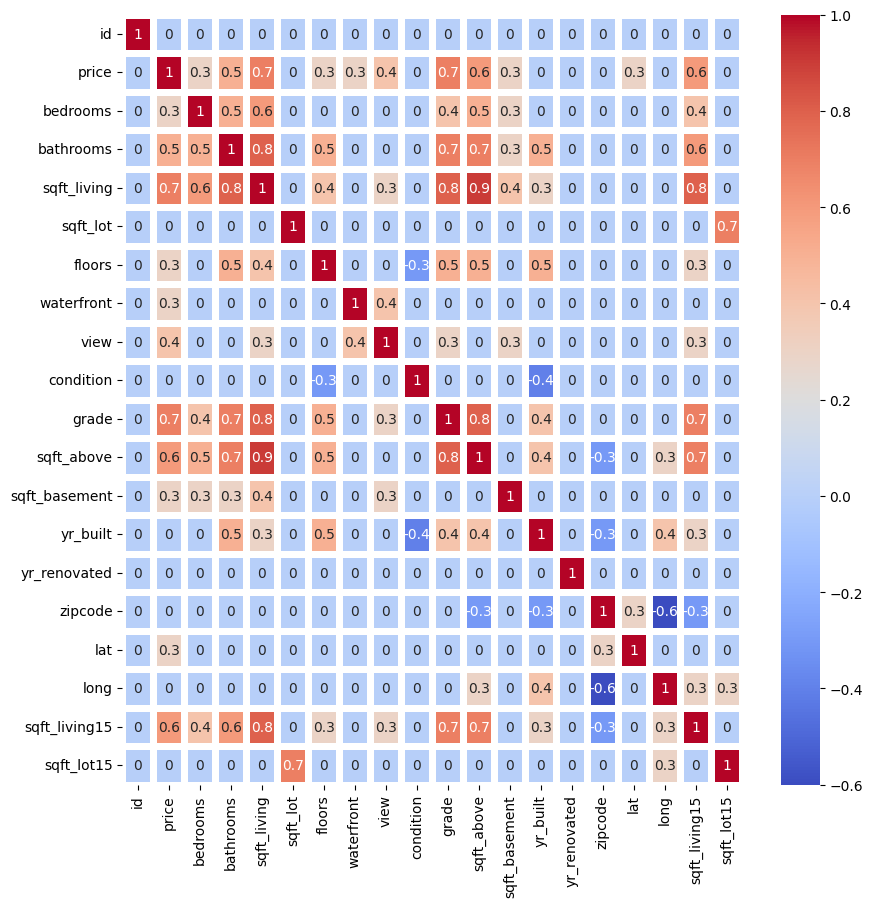

In [58]:
plt.figure(figsize = (10,10))
sns.heatmap(mtr, annot = True, linewidth = 5, cmap = 'coolwarm');


На данном грфике можно увидеть какие есть зависимости Цены от других показателей и далее эти показатели можно рассматривать более детально на отдельных графиках 

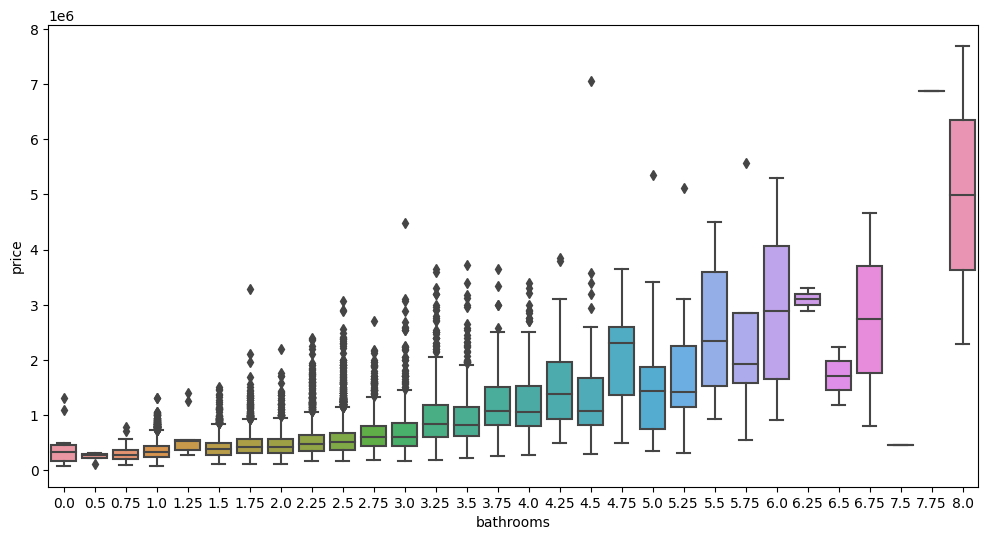

In [60]:
plt.figure(figsize = (12,6))
sns.boxplot(x = df['bathrooms'], y = df['price']) ;

Есть прямая зависимость между количеством ванных комнат и стоимостью дома. Отдельно можно выделить дома с 8 ванными. Цена на них сильнее всего выбивается из линейного тренда

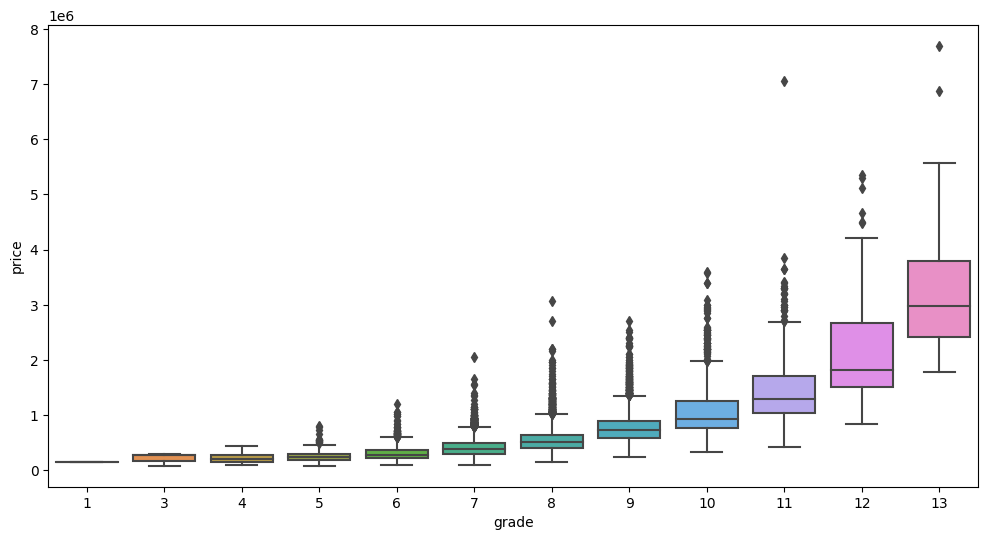

In [61]:
plt.figure(figsize = (12,6))
sns.boxplot(x = df['grade'], y = df['price']) ;

Видим, что и оценка дома дана достаточно точно. Соблюдается рост стоимости при росте оценки

<Figure size 1200x1200 with 0 Axes>

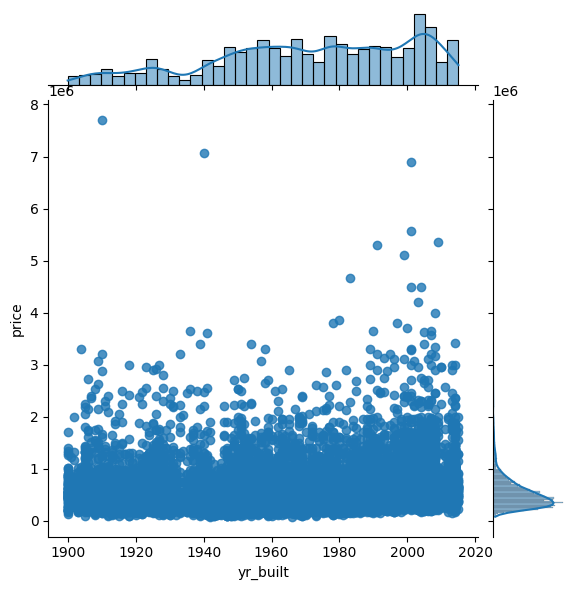

In [62]:
plt.figure(figsize = (12,12))
sns.jointplot(x = df['yr_built'], y = df['price'], kind = 'reg') ;

На удивление, нет четкой зависимости стоимости от года постройки.

<Figure size 1200x1200 with 0 Axes>

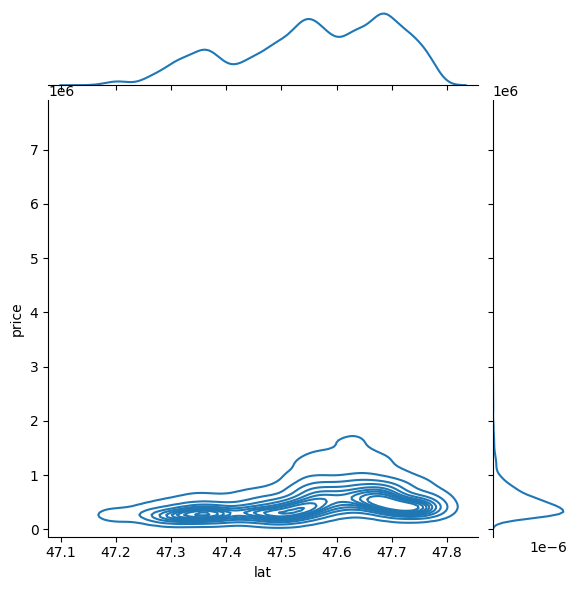

In [63]:
plt.figure(figsize = (12,12))
sns.jointplot(x = df['lat'], y = df['price'], kind = 'kde');

Видим интересную связь. В районе 47.6 широты цена недвижимости возрастает. Можем предположить, что там находится крупный город